# M2: Project 2

In this notebook we will be do multivariable analysis to develop a regression model that can predict the sale price of a property.

We will be using pandas for our data frame manipulation, seaborn and matplotlib for our plotting, numpy for math helpers, collections for dictionaries, scipy for our statistical analysis, patsy/statsmodels for our linear regression modeling, and sklearn for our fit analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from collections import defaultdict
import scipy
import patsy
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

Configure the default axis label size to 18.  Ensure the plots generated have a high resolution (150dpi).

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150)

## Data Set

Load the cleaned output from the first project.

In [3]:
df = pd.read_feather("../m1p1b/csc5610-m2-Sacramento-real-estate-transactions-cleaned.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      794 non-null    int64         
 1   address    794 non-null    object        
 2   city       794 non-null    category      
 3   zip        794 non-null    category      
 4   state      794 non-null    category      
 5   beds       794 non-null    int64         
 6   baths      794 non-null    int64         
 7   sq__ft     794 non-null    int64         
 8   type       794 non-null    category      
 9   sale_date  794 non-null    datetime64[ns]
 10  price      794 non-null    int64         
 11  latitude   794 non-null    float64       
 12  longitude  794 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 63.1+ KB


So we will be analyzing 794 records of data regarding sale price.

# Continuous Variable Analysis (Price)

We can compare price to the following columns for continuous analysis
* sq__ft
* latitude
* longitude

Note that while beds and baths are numerical values, because they are integral values with only about 5 distinct values they make for better categorical analysis.

## Square Footage vs. Price Analysis

[Text(0.5, 0, 'Square Footage'), Text(0, 0.5, 'Price (USD)')]

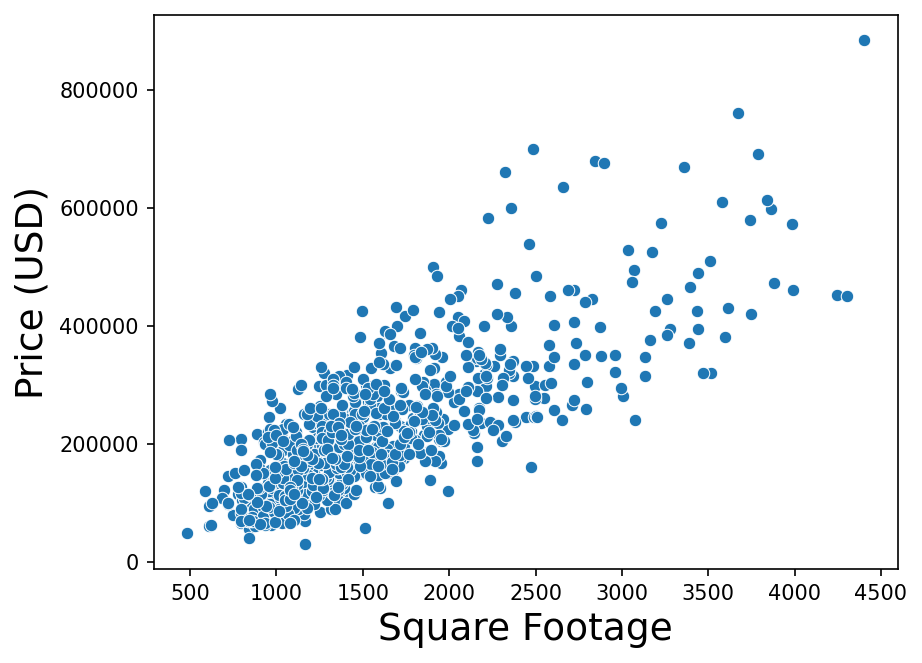

In [4]:
sq_ft_plot = sns.scatterplot(data=df, x="sq__ft", y="price")
sq_ft_plot.set(xlabel="Square Footage", ylabel="Price (USD)")

And the linear analysis

In [5]:
scipy.stats.linregress(df.price, df.sq__ft)

LinregressResult(slope=0.004372852291801698, intercept=601.0706041791153, rvalue=0.7781495213681995, pvalue=3.8758415565510652e-162, stderr=0.00012541615612172096, intercept_stderr=31.732029383686147)

This appears to be a good predictor.

## Latitude vs. Price Analysis

[Text(0.5, 0, 'Latitude'), Text(0, 0.5, 'Price (USD)')]

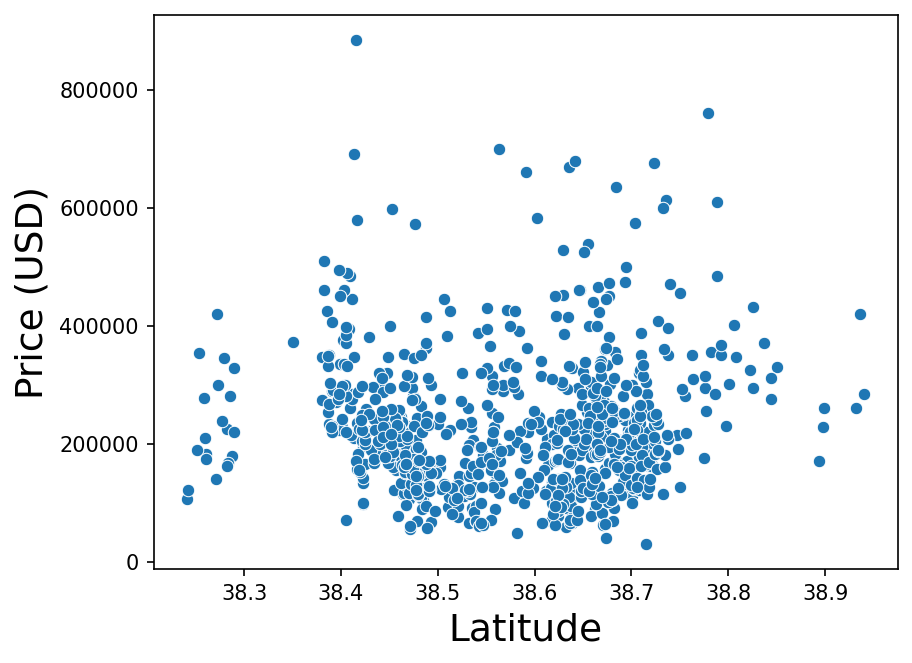

In [6]:
lat_plot = sns.scatterplot(data=df, x="latitude", y="price")
lat_plot.set(xlabel="Latitude", ylabel="Price (USD)")

In [7]:
scipy.stats.linregress(df.latitude, df.sq__ft)

LinregressResult(slope=-562.779536813326, intercept=23296.113887440897, rvalue=-0.10800164416270445, pvalue=0.0023083473164012794, stderr=184.0761698648461, intercept_stderr=7100.84628857426)

This does not appear to be good predictor.

## Longitude vs. Price Analysis

[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Price (USD)')]

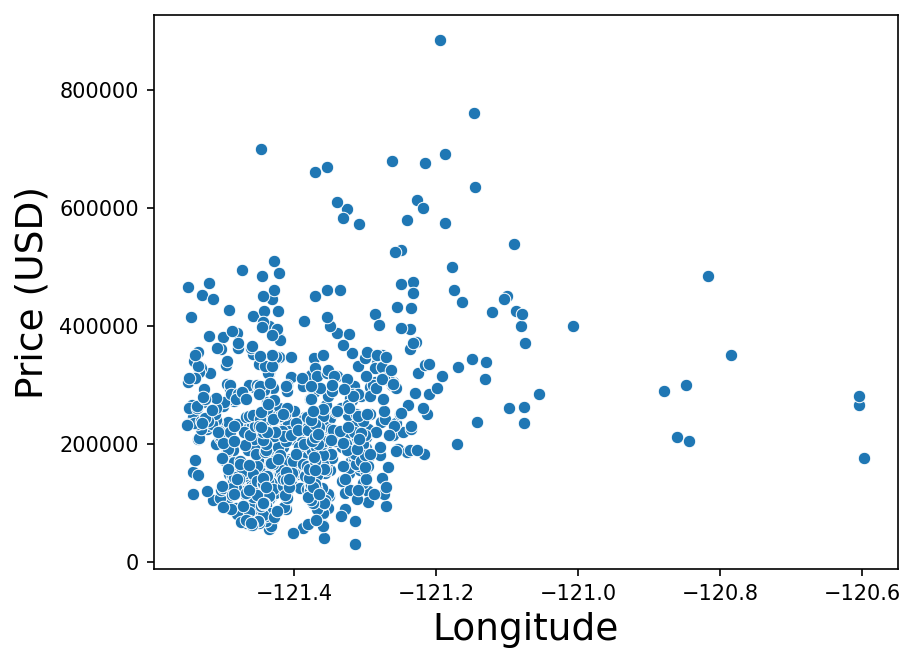

In [8]:
long_plot = sns.scatterplot(data=df, x="longitude", y="price")
long_plot.set(xlabel="Longitude", ylabel="Price (USD)")

In [9]:
scipy.stats.linregress(df.longitude, df.sq__ft)

LinregressResult(slope=681.2667929977241, intercept=84280.1096786246, rvalue=0.12046744053334134, pvalue=0.0006699763143814081, stderr=199.48512976668727, intercept_stderr=24213.888023735544)

This appears to be an okay predictor.

# Categorical Variable Analysis (Price)

We can compare price to the following columns for categorical analysis
* city
* zip
* beds
* baths
* type

## City vs. Price Analysis

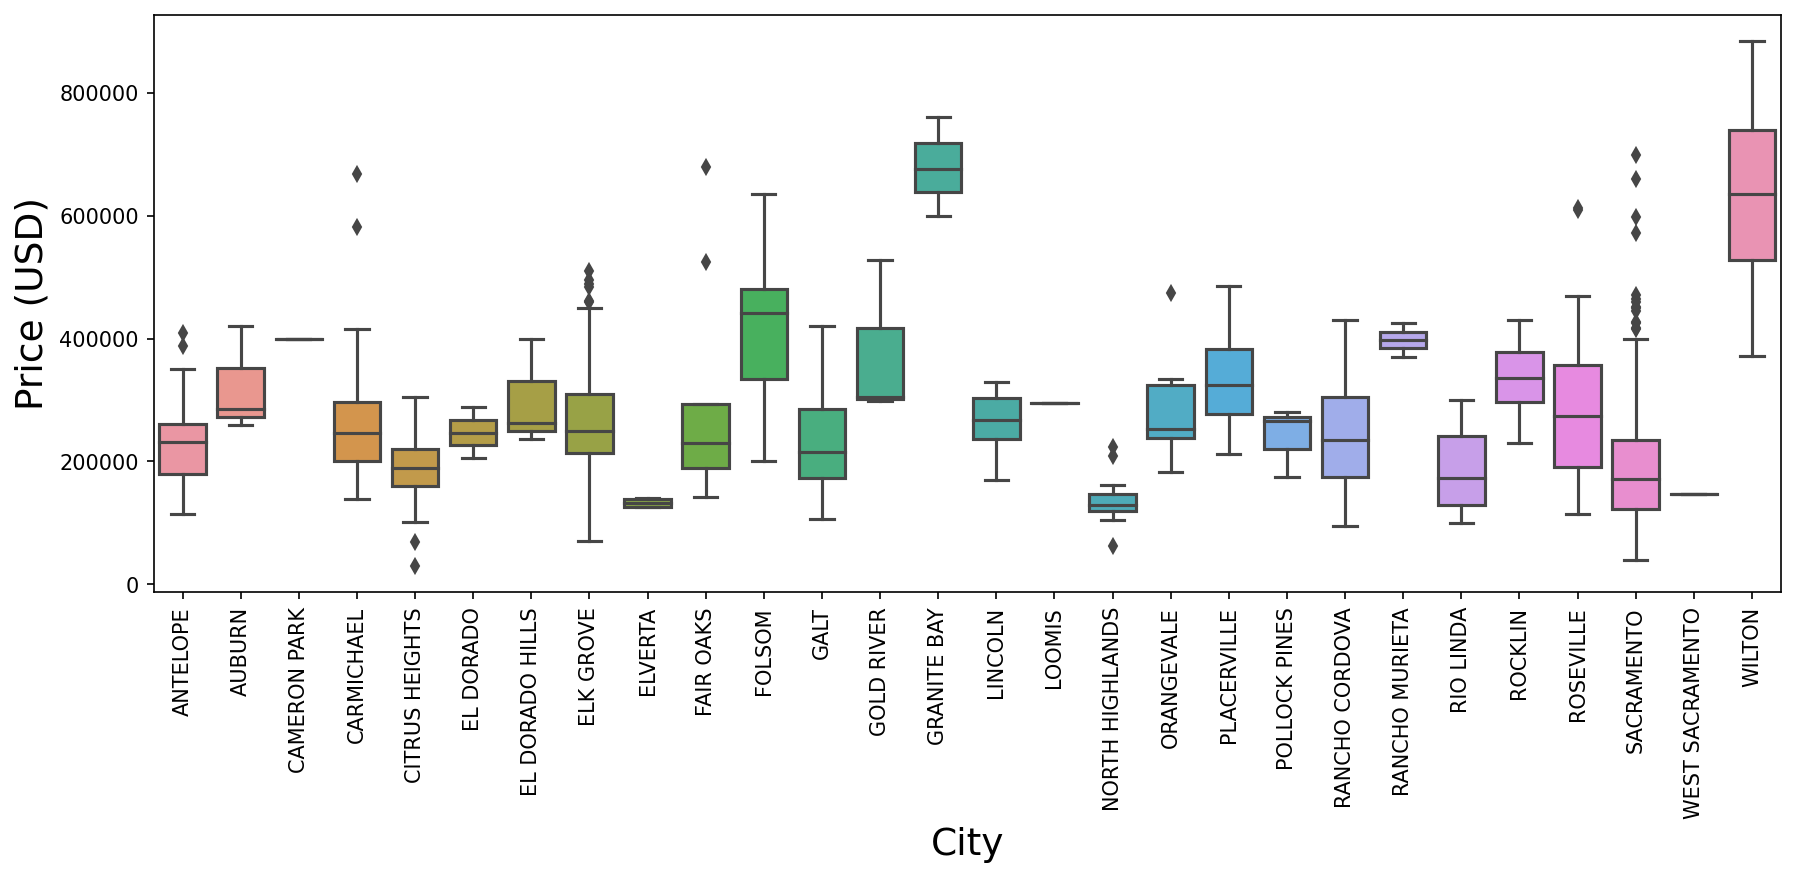

In [10]:
_, ax = plt.pyplot.subplots(figsize=(14, 5))
city_plot = sns.boxplot(data=df, x="city", y="price", ax=ax)
city_plot.set(xlabel="City", ylabel="Price (USD)");
city_plot.tick_params(axis="x", rotation=90)

In [11]:
scipy.stats.kruskal(*df.city.cat.categories.to_series().apply(lambda value: df.price[df.city == value].array))

KruskalResult(statistic=210.4983192423353, pvalue=2.453368806480581e-30)

This appears to be a good predictor.

## Zip vs. Price Analysis

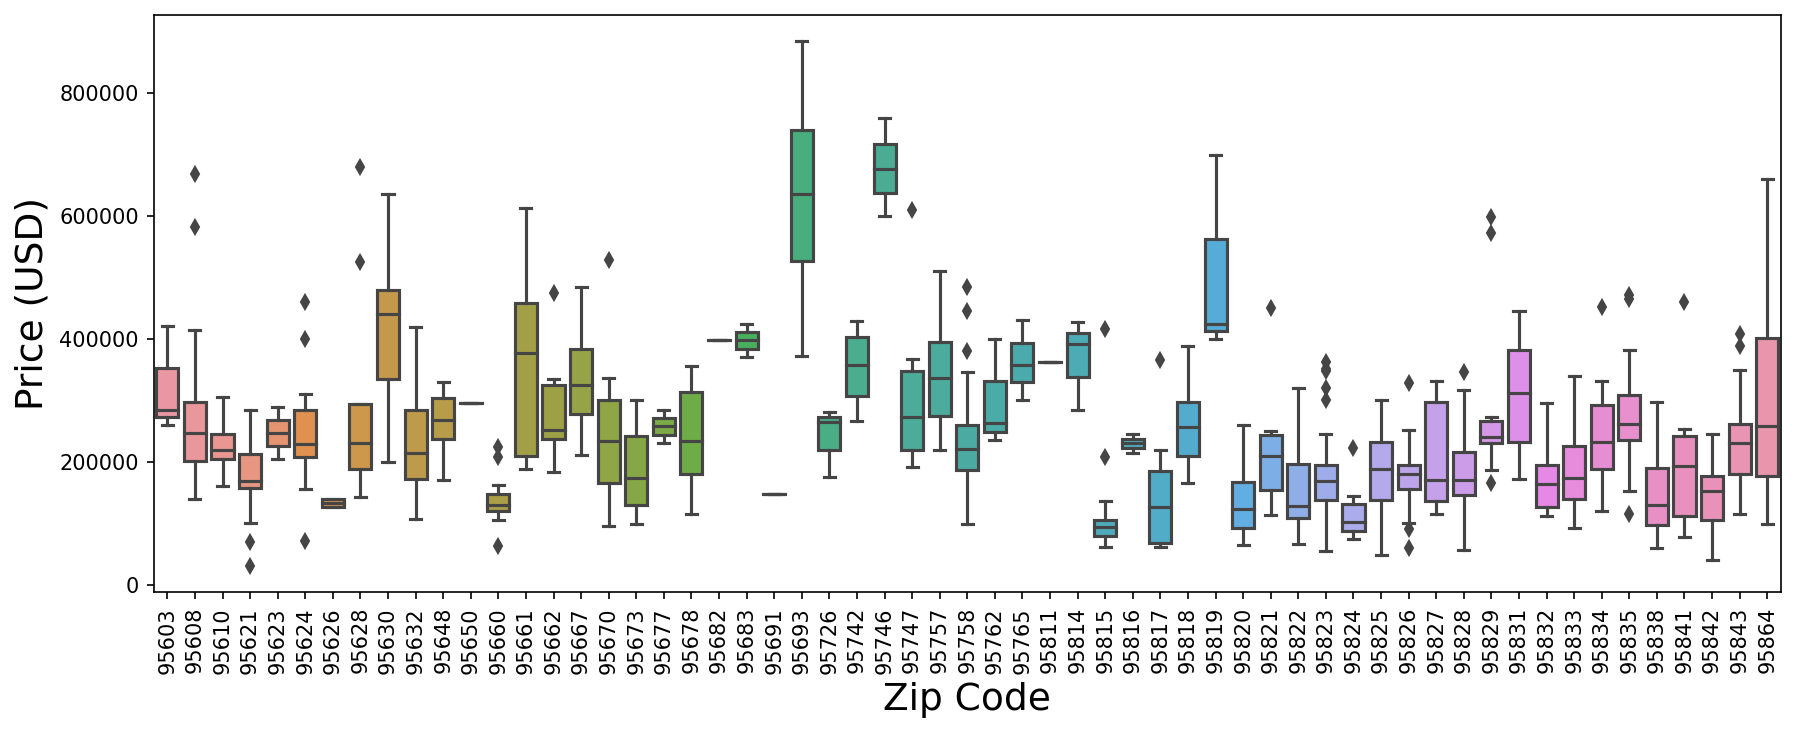

In [12]:
_, ax = plt.pyplot.subplots(figsize=(14, 5))
zip_plot = sns.boxplot(data=df, x="zip", y="price", ax=ax)
zip_plot.set(xlabel="Zip Code", ylabel="Price (USD)");
zip_plot.tick_params(axis="x", rotation=90)

In [13]:
scipy.stats.kruskal(*df.zip.cat.categories.to_series().apply(lambda value: df.price[df.zip == value].array))

KruskalResult(statistic=376.1567490767749, pvalue=3.8502223833887507e-48)

This appears to be a good predictor.

## Beds vs. Price Analysis

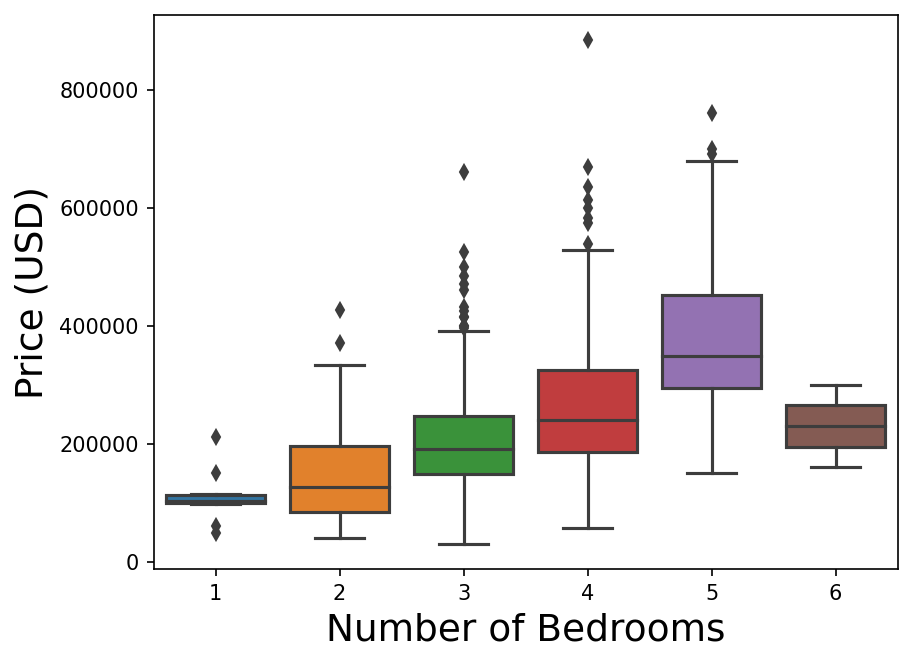

In [14]:
beds_plot = sns.boxplot(data=df, x="beds", y="price")
beds_plot.set(xlabel="Number of Bedrooms", ylabel="Price (USD)");

In [15]:
scipy.stats.kruskal(*pd.Series(df.beds.unique()).apply(lambda value: df.price[df.beds == value].array))

KruskalResult(statistic=204.30217145100872, pvalue=3.411433515370206e-42)

This appears to be a good predictor.

## Baths vs. Price Analysis

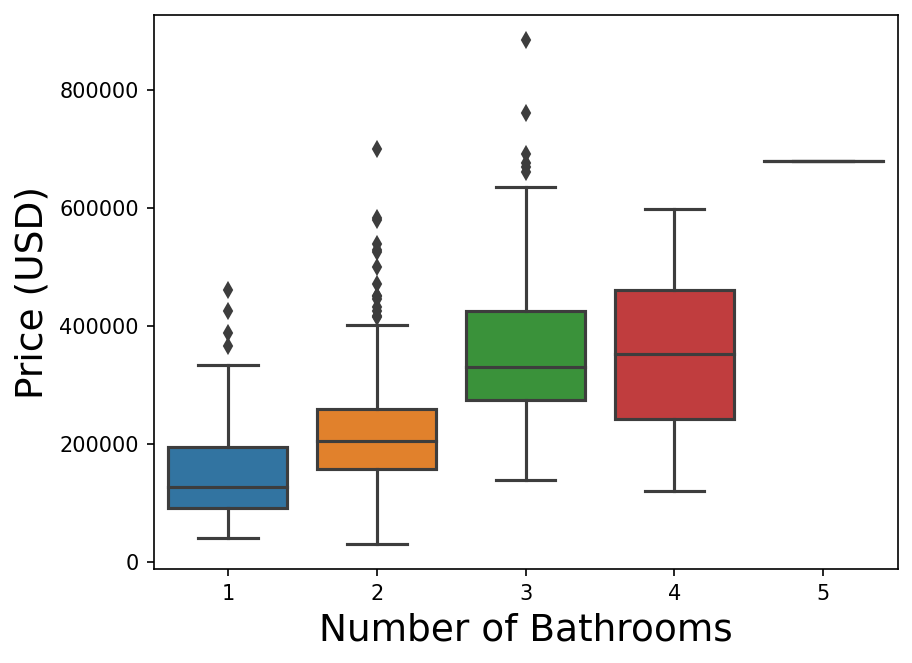

In [16]:
baths_plot = sns.boxplot(data=df, x="baths", y="price")
baths_plot.set(xlabel="Number of Bathrooms", ylabel="Price (USD)");

In [17]:
scipy.stats.kruskal(*pd.Series(df.baths.unique()).apply(lambda value: df.price[df.baths == value].array))

KruskalResult(statistic=253.18319698269218, pvalue=1.3421139741727966e-53)

This appears to be a good predictor.

## Type vs. Price Analysis

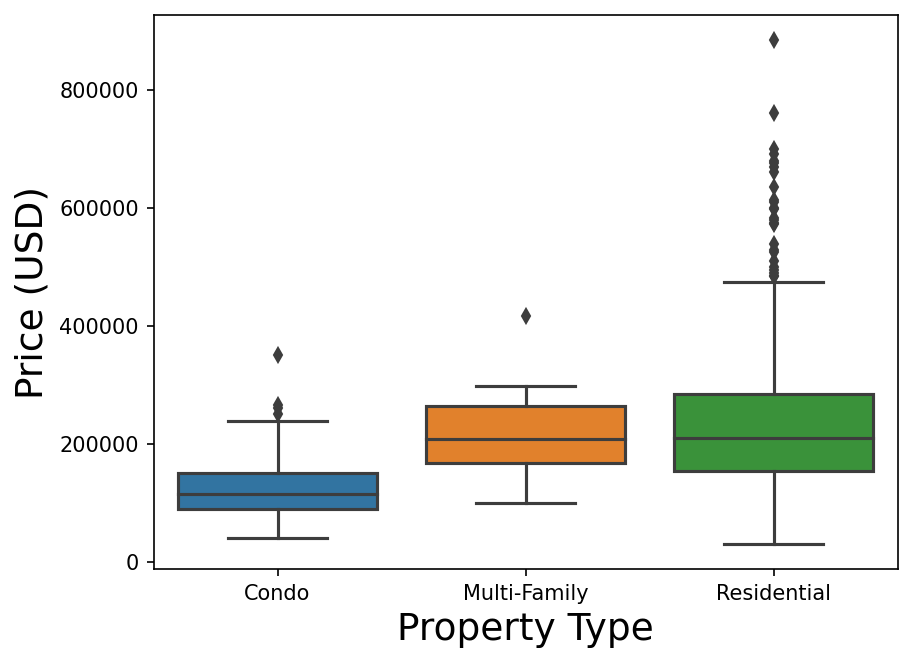

In [18]:
type_plot = sns.boxplot(data=df, x="type", y="price")
type_plot.set(xlabel="Property Type", ylabel="Price (USD)");

In [19]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.price[df.type == value].array))

KruskalResult(statistic=40.96790317206112, pvalue=1.270377691216139e-09)

This appears to be an okay predictor.

# Continuous Variable Analysis (Property Type)

We can compare the property type to the following continuous variables:
* price
* sq__ft* latitude
* 
longitude

## Price vs. Property Type Analysis

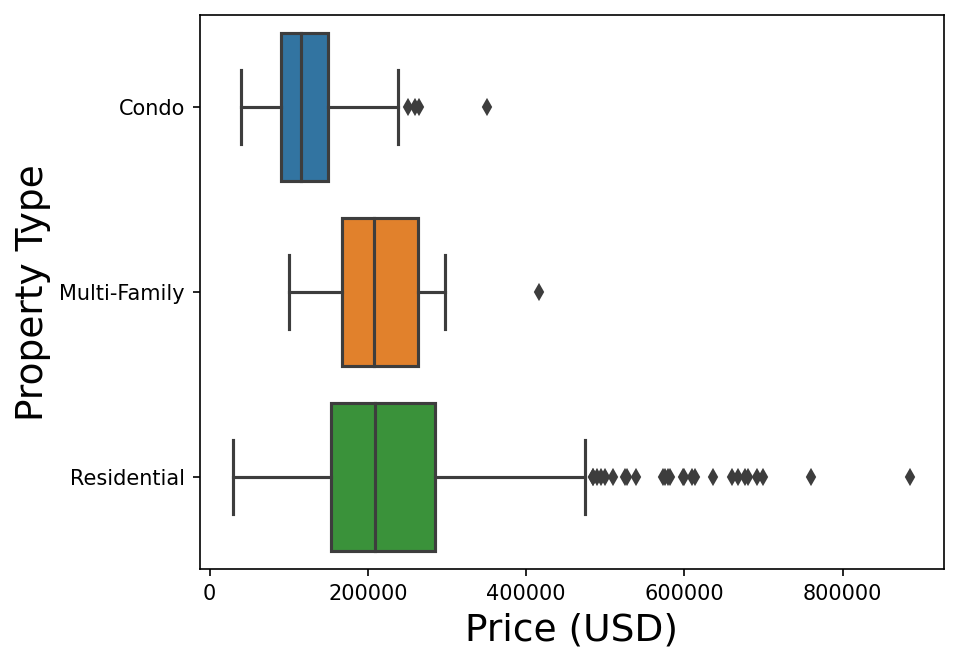

In [20]:
price_type_plot = sns.boxplot(data=df, x="price", y="type")
price_type_plot.set(xlabel="Price (USD)", ylabel="Property Type");

In [21]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.price[df.type == value].array))

KruskalResult(statistic=40.96790317206112, pvalue=1.270377691216139e-09)

This appears to be an okay predictor.

## Square Footage vs. Property Type Analysis

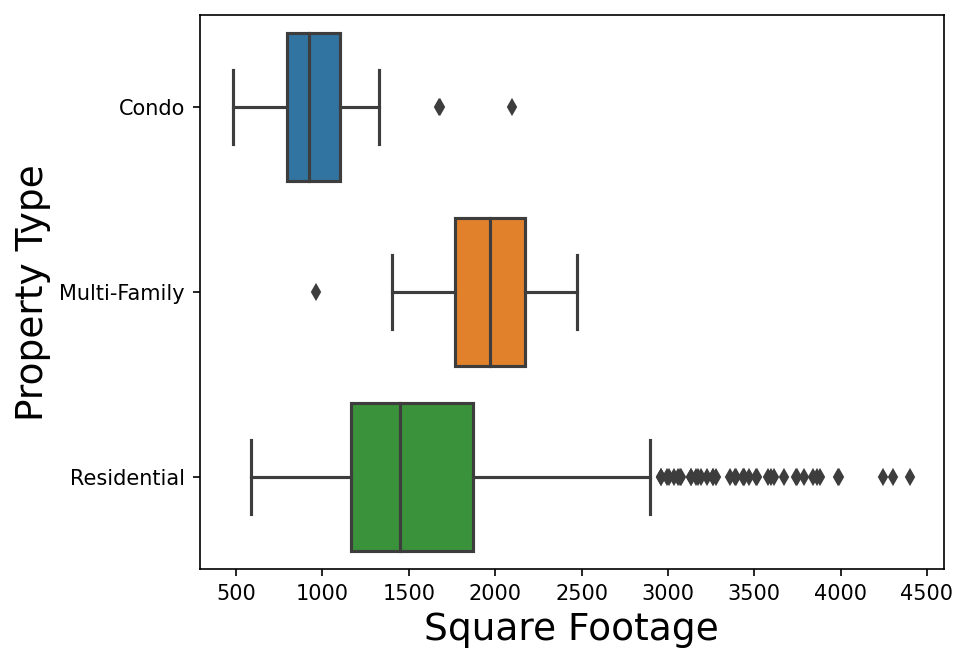

In [22]:
sq_ft_type_plot = sns.boxplot(data=df, x="sq__ft", y="type")
sq_ft_type_plot.set(xlabel="Square Footage", ylabel="Property Type");

In [23]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.sq__ft[df.type == value].array))

KruskalResult(statistic=67.53751863189704, pvalue=2.159803140666038e-15)

This appears to be a good predictor.

## Latitude vs. Property Type Analysis

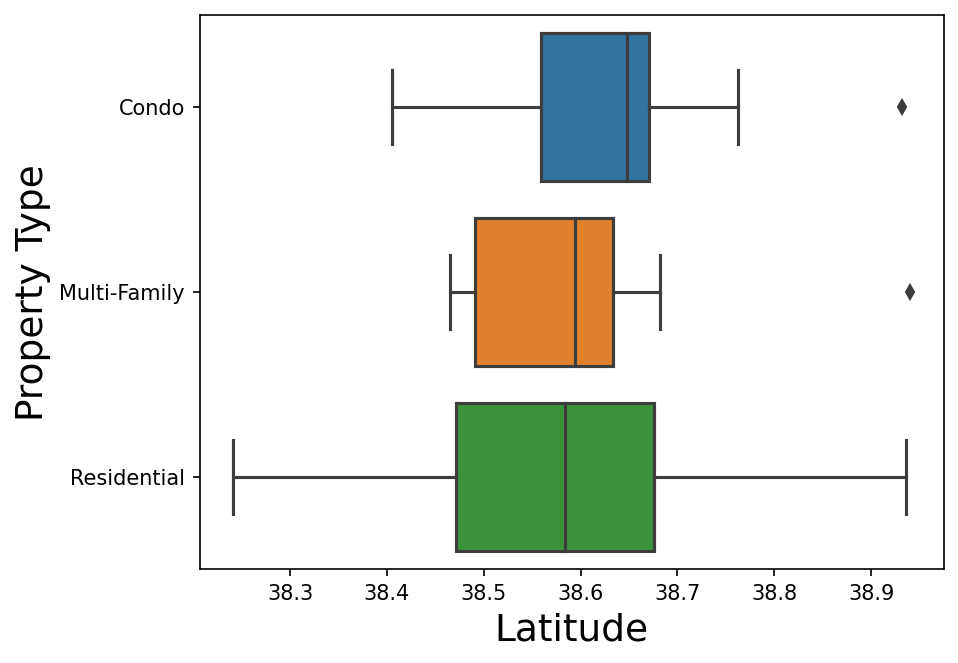

In [24]:
lat_type_plot = sns.boxplot(data=df, x="latitude", y="type")
lat_type_plot.set(xlabel="Latitude", ylabel="Property Type");

In [25]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.latitude[df.type == value].array))

KruskalResult(statistic=4.082470277114968, pvalue=0.1298682065469892)

This does not appear to be a good predictor.

## Longitude vs. Property Type Analysis

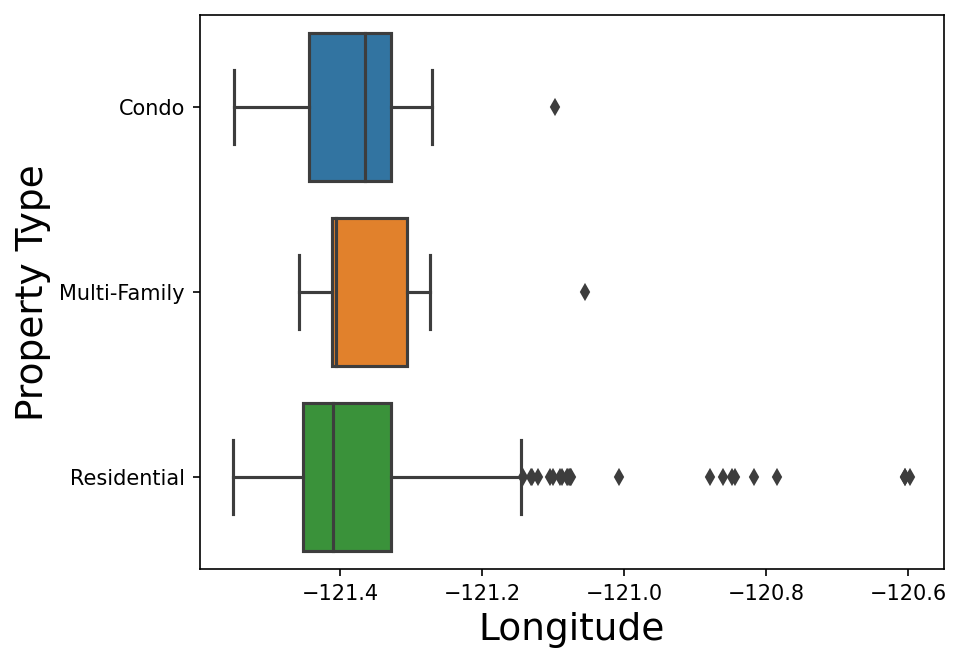

In [26]:
long_type_plot = sns.boxplot(data=df, x="longitude", y="type")
long_type_plot.set(xlabel="Longitude", ylabel="Property Type");

In [27]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.longitude[df.type == value].array))

KruskalResult(statistic=1.7787734051580741, pvalue=0.4109076841129423)

This does not appear to be a good predictor.

# Categorical Variable Analysis (Property Type)

We can compare the property type to the following categorical variables:
* city
* zip
* beds
* baths

## City vs. Property Type Analysis

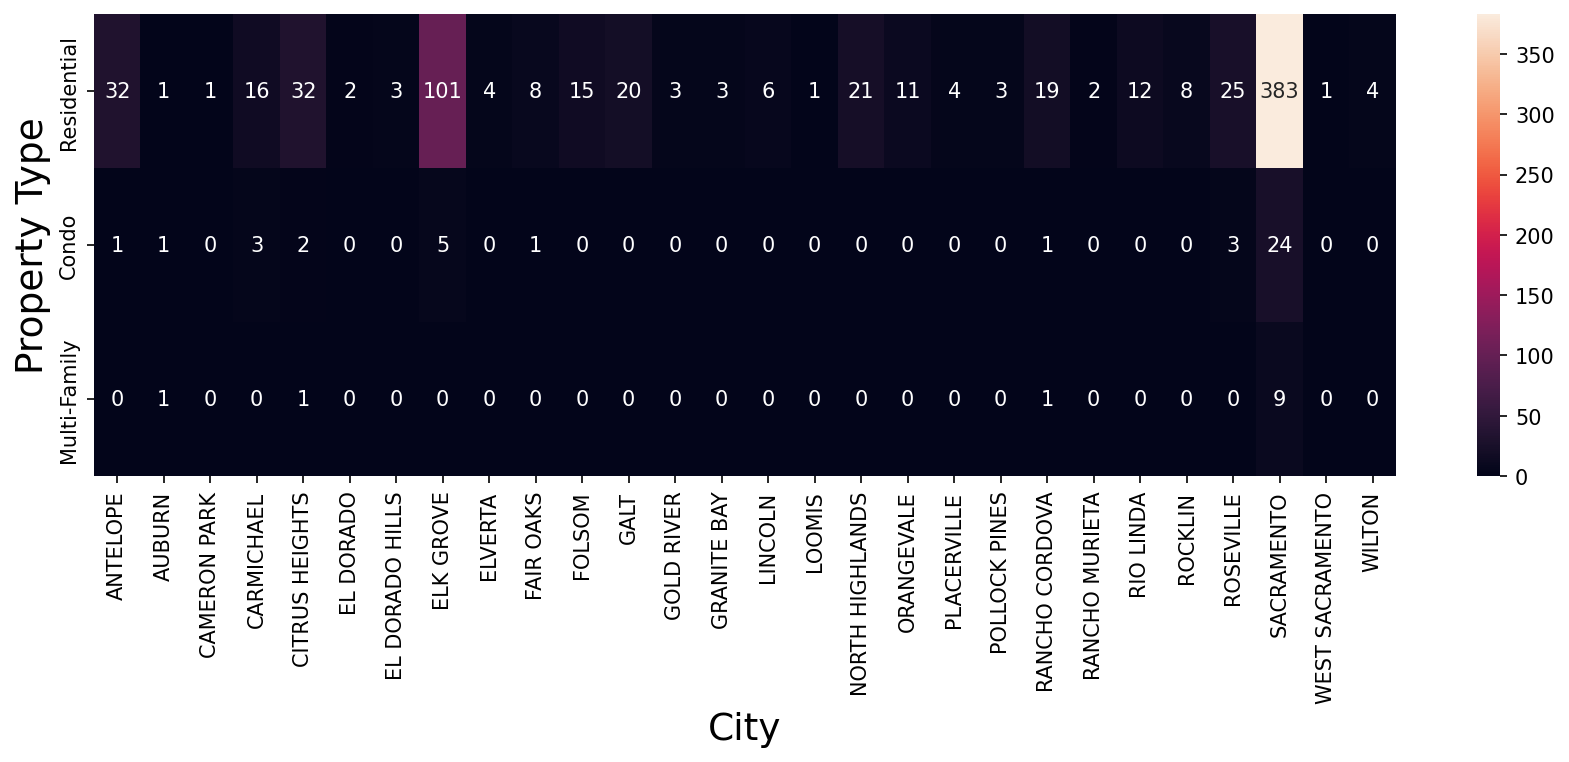

In [28]:
city_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    city_type[row.city][row.type] += 1
_, ax = plt.pyplot.subplots(figsize=(14, 4))
city_type_heat = sns.heatmap(pd.DataFrame.from_dict(city_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f", ax=ax)
city_type_heat.set(xlabel="City", ylabel="Property Type");

In [29]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["city", "type"]].groupby(by=["city", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=48.26803546298892, p=0.6941290940534962


This does not appear to be a good predictor.

## Zip vs. Property Type Analysis

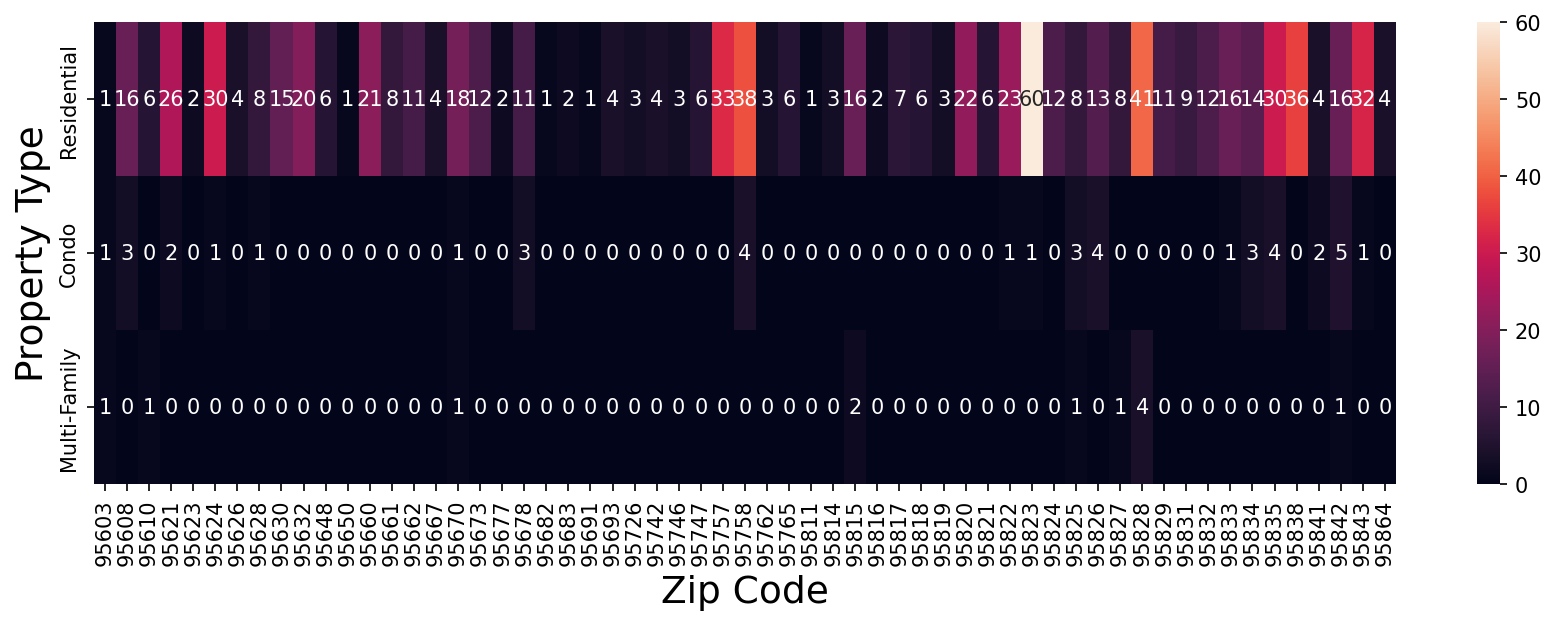

In [30]:
zip_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    zip_type[row.zip][row.type] += 1
_, ax = plt.pyplot.subplots(figsize=(14, 4))
zip_type_heat = sns.heatmap(pd.DataFrame.from_dict(zip_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f", ax=ax)
zip_type_heat.set(xlabel="Zip Code", ylabel="Property Type");

In [31]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["zip", "type"]].groupby(by=["zip", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=174.55950750710994, p=0.00036003926324442776


This appears to be an okay predictor.

## Beds vs. Property Type Analysis

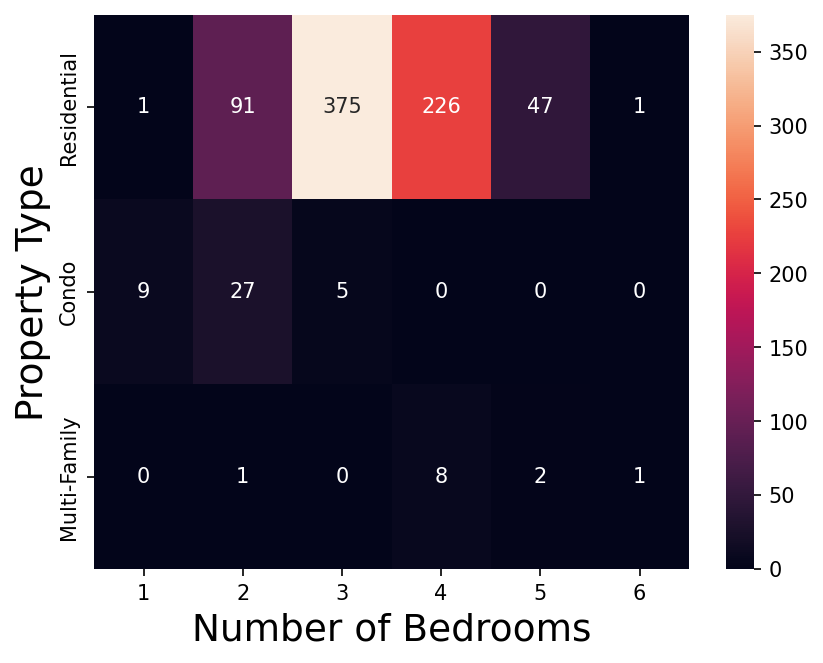

In [32]:
beds_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    beds_type[row.beds][row.type] += 1
beds_type_heat = sns.heatmap(pd.DataFrame.from_dict(beds_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f")
beds_type_heat.set(xlabel="Number of Bedrooms", ylabel="Property Type");

In [33]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["beds", "type"]].groupby(by=["beds", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=293.8460455250152, p=3.105946362678771e-57


This appears to be a good predictor.

## Baths vs. Property Type Analysis

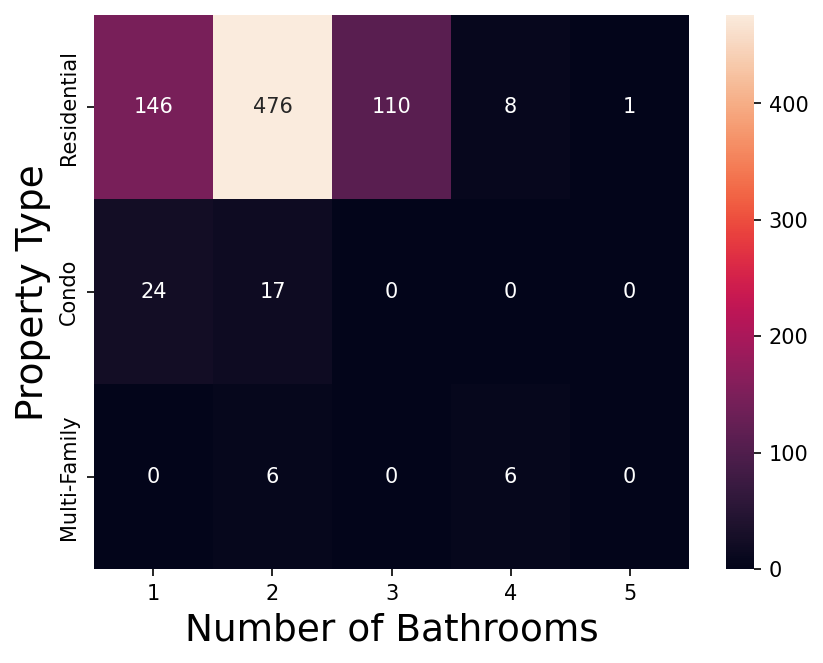

In [34]:
baths_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    baths_type[row.baths][row.type] += 1
baths_type_heat = sns.heatmap(pd.DataFrame.from_dict(baths_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f")
baths_type_heat.set(xlabel="Number of Bathrooms", ylabel="Property Type");

In [35]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["baths", "type"]].groupby(by=["baths", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=202.47941902416085, p=1.91860608202184e-39


This appears to be a good predictor.

# Linear Regression Model (Price)

We will use type, beds, baths, sq__ft, latitude, and longitude (independent variables) to predict sale price (dependent variable).
Note that it has been suggested that we use thousands-of-square-feet (`sq__ft_k`) to bring the scale of the column into line with other variables.

We will use patsy to set up our data into the proper matrix form.

In [36]:
df["sq__ft_k"] = df.sq__ft / 1000.0
y, X = patsy.dmatrices("price ~ type + beds + baths + sq__ft_k + latitude + longitude", data=df, return_type="dataframe")
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 793
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Intercept             794 non-null    float64
 1   type[T.Multi-Family]  794 non-null    float64
 2   type[T.Residential]   794 non-null    float64
 3   beds                  794 non-null    float64
 4   baths                 794 non-null    float64
 5   sq__ft_k              794 non-null    float64
 6   latitude              794 non-null    float64
 7   longitude             794 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


We can see that the property type categorical variable was split into multiple types and that an intercept column was added.

Now we will use the statsmodels library to optimize for least square and analyze the resulting fit summary.

In [37]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     214.1
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          2.42e-177
Time:                        20:03:36   Log-Likelihood:                -9954.9
No. Observations:                 794   AIC:                         1.993e+04
Df Residuals:                     786   BIC:                         1.996e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.719e+07   3.08e+06      5.582      0.000    1.11e+07    2.32e+07
type[T.Multi-Family] -1.844e+04   2.37e+04     -0.779      0.436   -6.49e+04     2.8e+04
type[T.Residential]    3.17e+04   1.18e+04      2.689      0.007    8555.560    5.48e+04
beds                  -1.96e+04   4540.204     -4.318      0.000   -2.85e+04   -1.07e+04
baths                 3975.8520   5648.472      0.704      0.482   -7112.024    1.51e+04
sq__ft_k              1.498e+05   6223.399     24.078      0.000    1.38e+05    1.62e+05
latitude              6.378e+04   2.07e+04      3.082      0.002    2.32e+04    1.04e+05
longitude             1.618e+05   2.25e+04      7.206      0.000    1.18e+05    2.06e+05
==============================================================================
Omnibus:                      149.806   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.841
Skew:                           0.994   Prob(JB):                     5.97e-80
Kurtosis:                       5.659   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overall the adjusted R-squared value is okay (0.653) and that the global Prob(F-stat) indicates there is an underlying linear relationship.

From the column breakdown, we can see that Multi-Family is a bad predictor but Residential is a good predictor.  We can also see that baths is a bad predictor.

Let us limit the original data to just residential properties and exclude the type and baths columns.

In [38]:
filtered_df = df[lambda row: row.type == "Residential"].copy()
y, X = patsy.dmatrices("price ~ beds + sq__ft_k + latitude + longitude", data=filtered_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     341.0
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          6.67e-166
Time:                        20:03:36   Log-Likelihood:                -9299.5
No. Observations:                 741   AIC:                         1.861e+04
Df Residuals:                     736   BIC:                         1.863e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.837e+07   3.18e+06      5.785      0.000    1.21e+07    2.46e+07
beds       -1.687e+04   4554.277     -3.704      0.000   -2.58e+04   -7926.354
sq__ft_k    1.502e+05   5529.041     27.166      0.000    1.39e+05    1.61e+05
latitude     5.67e+04   2.14e+04      2.647      0.008    1.46e+04    9.87e+04
longitude    1.69e+05   2.32e+04      7.282      0.000    1.23e+05    2.15e+05
==============================================================================
Omnibus:                      134.833   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.032
Skew:                           0.973   Prob(JB):                     6.44e-69
Kurtosis:                       5.526   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted R-squared actually went down just a bit (0.648) but the P>|t| values all look good for the remaining 741 rows.

Let us plot the predicted vs. the true value.

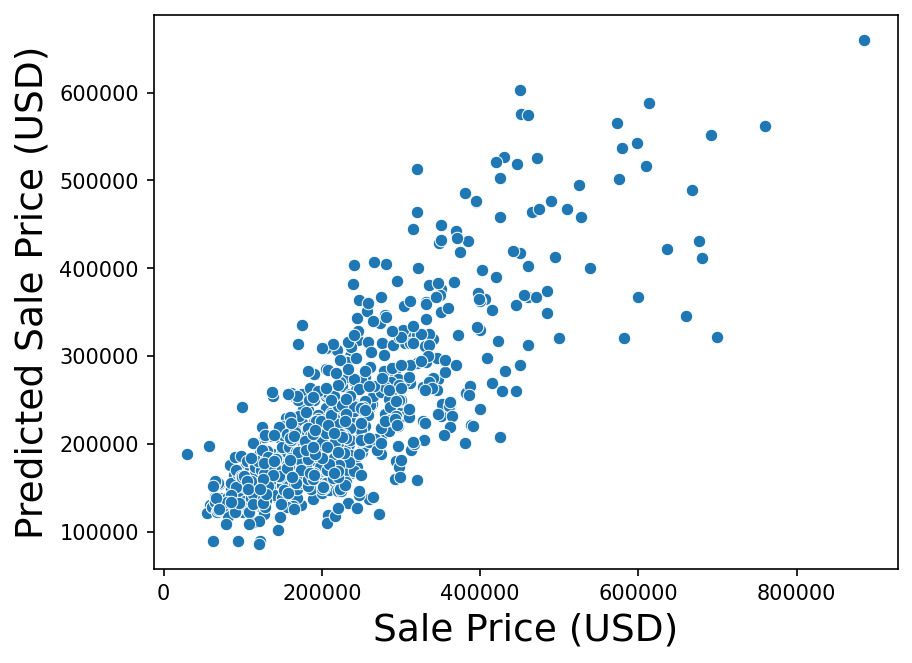

In [39]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.price, y=pred_y)
pred_true_plot.set(xlabel="Sale Price (USD)", ylabel="Predicted Sale Price (USD)");

We can see a strong linear relationship between the true sale price and our predicted sale price.

In [40]:
mse = mean_squared_error(y.price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.price, pred_y)
print(f"RMSE (USD): ${rmse:,.0f}, MAPE: {mape:.1%}")

RMSE (USD): $68,251, MAPE: 26.5%


We have a root mean-squared error of about $68k and a mean absolute %error of 26.5%.

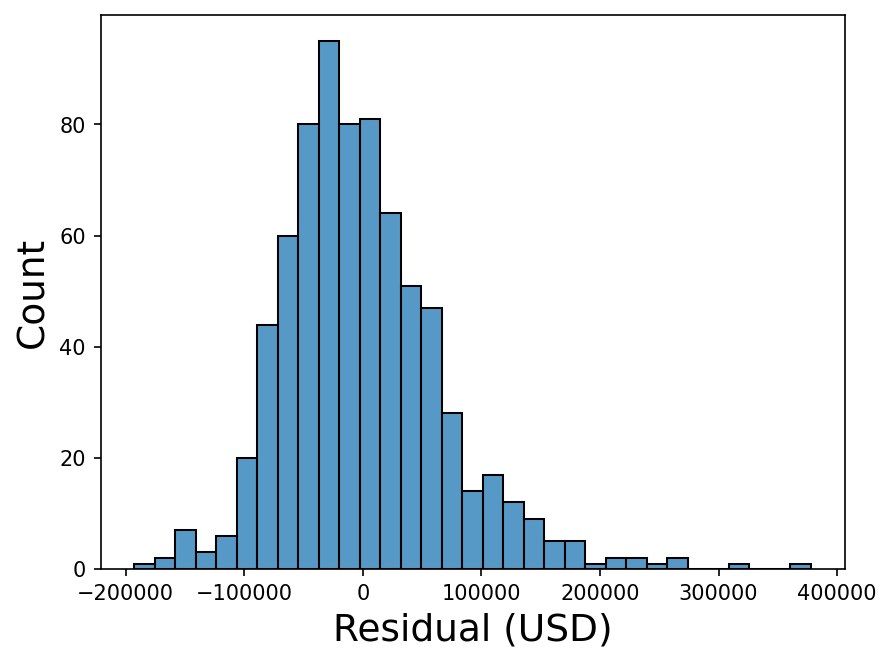

In [41]:
residuals_hist_plot = sns.histplot(x=results.resid)
residuals_hist_plot.set(xlabel="Residual (USD)", ylabel="Count");

Our residual histogram plot looks normal-ish; but perhaps a bit skewed to the left.

In [42]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.9547348022460938, pvalue=2.5363451234563204e-14)

Our p-value indicates this is a good predictor.

In [43]:
np.mean(results.resid)

1.433495226015768e-08

We have a mean error of approximately zero.

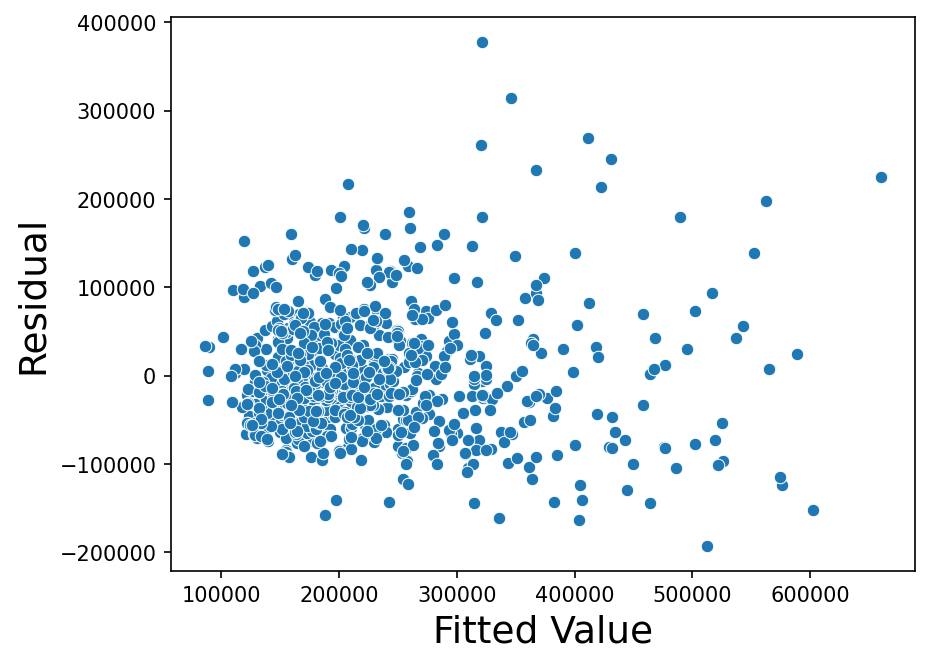

In [44]:
residuals_fit_plot = sns.scatterplot(x=results.fittedvalues, y=results.resid)
residuals_fit_plot.set(xlabel="Fitted Value", ylabel="Residual");

This shows that are residual error is becoming more erratic as our fitted value goes up.
This means that our model is worse at predicting the more expensive properties.

# Linear Regression Model (log(Price))

Our error distribution appeared to be left-skewed.
Also, our residual error increased in variance as our fitted value grew.
From our previous notebook we saw a strong possibility that price had a power law distribution.
Let us switch our model to predict the log of the price.

In [45]:
log_df = filtered_df.copy()
log_df["log_price"] = np.log(log_df.price)
y, X = patsy.dmatrices("log_price ~ baths + sq__ft_k + latitude + longitude", data=log_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     243.4
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          4.32e-133
Time:                        20:03:37   Log-Likelihood:                -201.47
No. Observations:                 741   AIC:                             412.9
Df Residuals:                     736   BIC:                             436.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.5555     14.780      6.262      0.000      63.540     121.571
baths          0.0682      0.027      2.535      0.011       0.015       0.121
sq__ft_k       0.4839      0.027     18.217      0.000       0.432       0.536
latitude       0.1765      0.100      1.771      0.077      -0.019       0.372
longitude      0.7254      0.108      6.718      0.000       0.513       0.937
==============================================================================
Omnibus:                       32.057   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.201
Skew:                          -0.318   Prob(JB):                     1.03e-12
Kurtosis:                       4.176   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have a lower adjusted R-squared value (0.567), we will need to filter down to Residential property types, and baths ends up being a better predictor than beds.

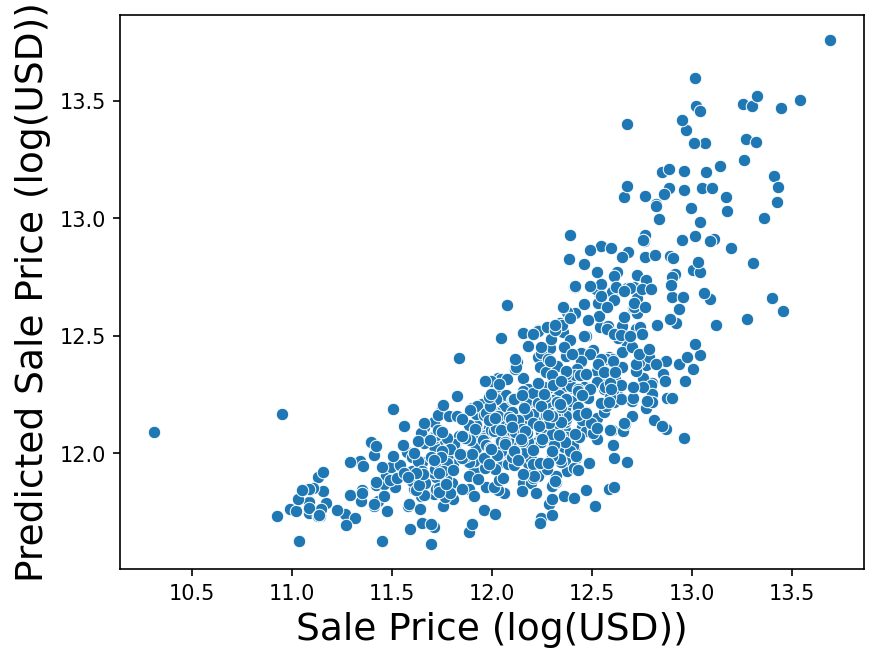

In [46]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.log_price, y=pred_y)
pred_true_plot.set(xlabel="Sale Price (log(USD))", ylabel="Predicted Sale Price (log(USD))");

We still have a strong linear relationship (but posssibly with a few outliers still).

In [47]:
log_df[lambda row: row.log_price < 11]

,index,address,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sq__ft_k,log_price
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,0.836,10.989048
69,605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,2008-05-16,55422,38.471646,-121.435158,0.838,10.922732
293,867,7401 TOULON LN,SACRAMENTO,95828,CA,4,2,1512,Residential,2008-05-15,56950,38.488628,-121.387759,1.512,10.949929
469,603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,2008-05-16,30000,38.715322,-121.314787,1.166,10.308953


Let us filter out two of those bad outliers and re-run the analysis.

In [48]:
log_df = log_df[lambda row: (row.address != "7401 TOULON LN") & (row.address != "8208 WOODYARD WAY")]
y, X = patsy.dmatrices("log_price ~ baths + sq__ft_k + latitude + longitude", data=log_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     257.2
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          5.05e-138
Time:                        20:03:37   Log-Likelihood:                -178.01
No. Observations:                 739   AIC:                             366.0
Df Residuals:                     734   BIC:                             389.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.5116     14.330      6.526      0.000      65.379     121.644
baths          0.0735      0.026      2.815      0.005       0.022       0.125
sq__ft_k       0.4771      0.026     18.511      0.000       0.426       0.528
latitude       0.1857      0.097      1.921      0.055      -0.004       0.376
longitude      0.7361      0.105      7.032      0.000       0.531       0.942
==============================================================================
Omnibus:                        0.425   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.521
Skew:                          -0.038   Prob(JB):                        0.771
Kurtosis:                       2.895   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That improved our adjusted R-squared value (0.581).

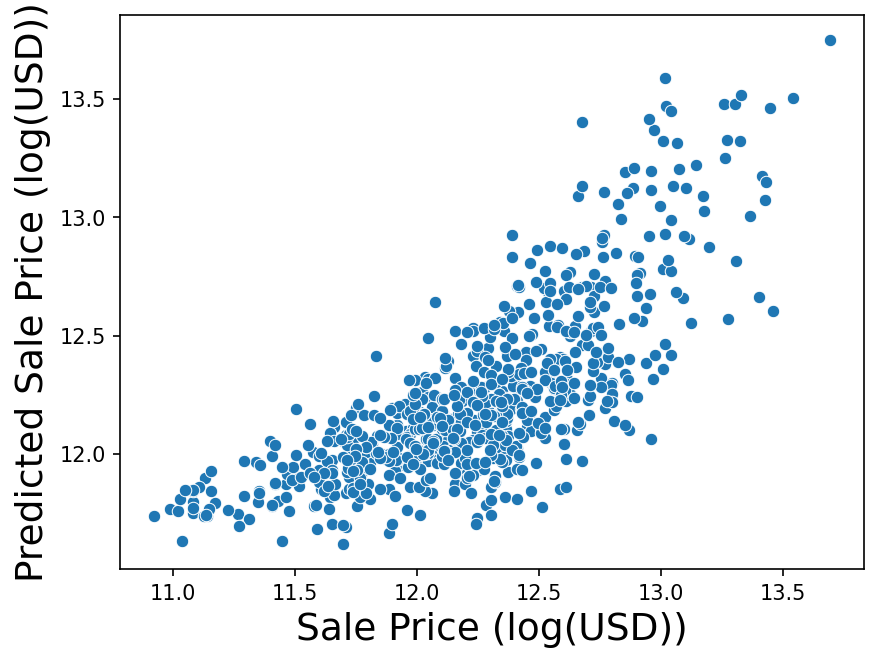

In [49]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.log_price, y=pred_y)
pred_true_plot.set(xlabel="Sale Price (log(USD))", ylabel="Predicted Sale Price (log(USD))");

And that cleaned up those two bad outliers.

In [50]:
mse = mean_squared_error(y.log_price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.log_price, pred_y)
print(f"RMSE (USD): ${np.exp(rmse):,.2f}, MAPE: {mape:.1%}")

RMSE (USD): $1.36, MAPE: 2.0%


Our error and percentage look much better.

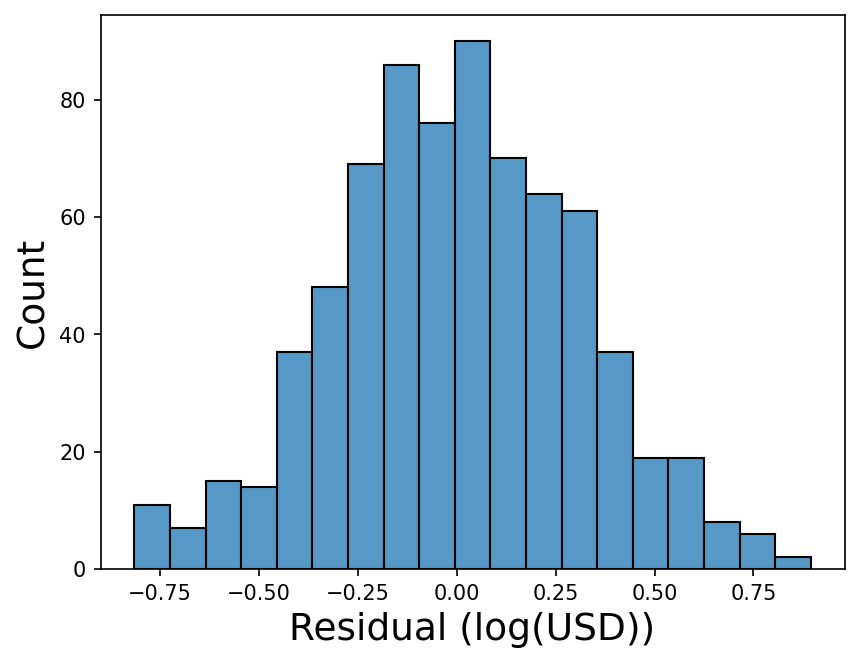

In [51]:
residuals_hist_plot = sns.histplot(x=results.resid)
residuals_hist_plot.set(xlabel="Residual (log(USD))", ylabel="Count");

And this looks like an excellent normal distribution.

In [52]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.9975664019584656, pvalue=0.3538418710231781)

But our p-value isn't nearly as good.  However, the shapiro statistic is nearly 1.

In [53]:
np.mean(results.resid)

-2.679678761249525e-13

Our mean error is very close to zero.

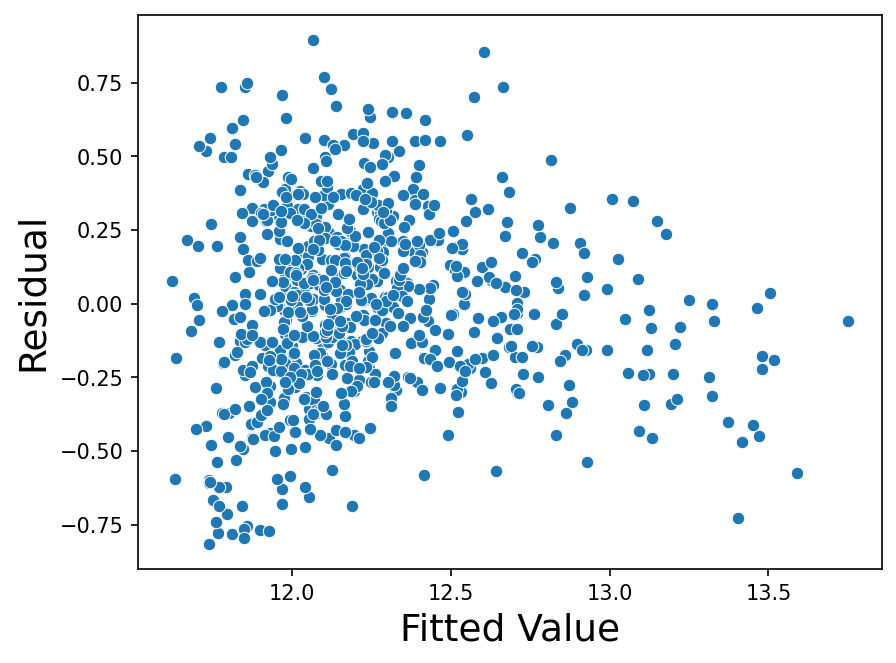

In [54]:
residuals_fit_plot = sns.scatterplot(x=results.fittedvalues, y=results.resid)
residuals_fit_plot.set(xlabel="Fitted Value", ylabel="Residual");

Our scatter plot of fitted value to residual looks much better now.  It is more dense for lower fitted values but that is just because our sample size was so much larger for more inexpensive houses than it was for very expensive houses.